# Assignment 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

# 1.

## a. The average reaction time in the Stroop test of 12 participants in a neurocognitive study is {590, 748, 579, 544, 570, 598, 599, 673, 635, 714, 580, 565} in milliseconds. Is the reaction time of this cohort unusual compared to the standard reaction time of 570 milliseconds at a significance level of 0.05? What are the sample mean, standard deviation, t-statistic, degree of freedom, and p-value?

In this scenario, we want to perform a two-tailed one-sample t-test where the null hypothesis is $$H_0: \mu = \mu_0$$ and the alternative hypothesis is $$H_A: \mu \neq \mu_0$$

In [2]:
samples = np.array([590, 748, 579, 544, 570, 598, 599, 673, 635, 714, 580, 565])

# number of samples
N = len(samples)
# alpha
alpha = 0.05
# standard reaction time
mu0 = 570

For one sample t-test, $t$ is given by $$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$$
where $\bar{x}$ is the sample mean, $s$ is the sample standard deviation given by $s = \sqrt{\frac{\sum{(x_i - \bar{x})^2}}{n-1}}$, $\mu_0$ is the specified value of the population mean under the null hypothesis, and $n$ is the sample size.

In [3]:
# sample mean
x = samples.mean()
# sample std
s = samples.std(ddof=1)
print('Sample mean: ', x, '\nSample STD: ', s)

Sample mean:  616.25 
Sample STD:  63.59834903517543


In [4]:
# t-statistic
t = (x - mu0) / (s/np.sqrt(N))
print('T-statistic: ', t)

T-statistic:  2.519164445786296


In one sample t-test, the degrees of freedom are $n − 1$

In [5]:
# degree of freedom
df = N - 1
print('DOF: ', df)

DOF:  11


In [6]:
# one sample t test
stats.ttest_1samp(samples, mu0, nan_policy='raise', alternative='two-sided')

TtestResult(statistic=2.5191644457862963, pvalue=0.02851786955873765, df=11)

<strong>
    The reaction time of the cohort is significant compared to the standard reaction time (p < 0.05).
    <ul>
        <li> sample mean: 616.25 </li>
        <li> sample standard deviation: 63.589 </li>
        <li> t-statistic: 2.519 </li>
        <li> degree of freedom: 11 </li>
        <li> p-value: 0.0285 </li>
    </ul>
</strong>

## b. The Stroop test was then separately taken for another cohort of 8 participants {570, 535, 606, 572, 568, 600, 554, 575}. Are the two cohorts significantly different in the reaction time based on two-tailed two-sample t-test? What about the significance under one-tailed test?

Here, we want to perform a two-sample t-test where sample sizes are unequal and variances are assumed to be similar. This is given by $$t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}\cdot {\sqrt {{\frac {1}{n_{1}}}+{\frac {1}{n_{2}}}}}}}$$ where $${s_{p}={\sqrt {\frac {(n_{1}-1)s_{X_{1}}^{2}+(n_{2}-1)s_{X_{2}}^{2}}{n_{1}+n_{2}-2}}}}$$
is the pooled standard deviation.

In [7]:
samples2 = np.array([570, 535, 606, 572, 568, 600, 554, 575])

# sample size of 2nd batch of samples
N2 = len(samples2)

In [8]:
# pooled standard deviation
sp = np.sqrt(((N-1)*samples.var(ddof=1) + (N2-1)*samples2.var(ddof=1))/(N + N2 - 2))
# t statistic
t = (samples.mean() - samples2.mean()) / (sp * np.sqrt((1/N) + (1/N2)))
print(t, sp)

1.8532185387550502 51.721610570437576


In [9]:
# two sample t test assuming similar variances (two tailed)
stats.ttest_ind(samples, samples2, axis=0, equal_var=True, nan_policy='raise', alternative='two-sided')

Ttest_indResult(statistic=1.8532185387550504, pvalue=0.08031716997740455)

In [10]:
# compare means of the 2 samples
print(samples.mean(), samples2.mean())

616.25 572.5


The null hypothesis is $H_0: \mu_1 = \mu_2$. Alternative hypothesis is $H_A: \mu_1 > \mu_2$.

In [11]:
# two sample t test (one tailed)
stats.ttest_ind(samples, samples2, axis=0, equal_var=True, nan_policy='raise', alternative='greater')

Ttest_indResult(statistic=1.8532185387550504, pvalue=0.04015858498870228)

#### The two groups are not significantly different based on a two-tailed test but are significantly different based on a one-tailed test.

# 2. A recently proposed machine learning model was applied to an MRI dataset to classify the binary diagnosis label of 100 subjects of age 40 years, resulting in 85 subjects correctly classified and 15 subjects wrongly classified. For the following three questions, what are the chi-squared statistic and p-value?

In [12]:
# marginal frequency
N = 100
# contingency table
df = pd.DataFrame([[85, 15]], columns=['correct', 'incorrect'], index=['40 yo'])
df

,correct,incorrect
40 yo,85,15


## a. Is the proposed classifier significantly more accurate than random guessing?

Random guessing will result in uniform probability for each class $$p_i = 1/K$$ where $K$ is the number of classes. In our case $K=2$.

We can get the expected value (frequencies) of random guessing: $$m_i = p_i \times N$$ where $m_i$ is the expected value of class $k=i$ and $N$ is the marginal frequency.

In [13]:
# number of classes
K = 2
# probabilities for each class
probs = [1/K for p in ['correct', 'incorrect']]
# expected frequency when guessing randomly
df_expected = pd.DataFrame([[p*N for p in probs]], columns=['correct', 'incorrect'], index=['40 yo'])
df_expected

,correct,incorrect
40 yo,50.0,50.0


$X^2$ is given by $${X^{2}=\sum _{i=1}^{k}{\frac {(x_{i}-m_{i})^{2}}{m_{i}}}}$$

In [14]:
# calculate chi squared
chisq = (np.square(df.loc['40 yo'] - df_expected.loc['40 yo'])/ df_expected.loc['40 yo']).sum()
print('Chi-squared: ', chisq)

Chi-squared:  49.0


In [15]:
# chi squared test with DOF = K-1 = 1
stats.chisquare(f_obs=df.loc['40 yo'], f_exp=df_expected.loc['40 yo'], ddof=0)

Power_divergenceResult(statistic=49.0, pvalue=2.559625087771672e-12)

<strong>
    The proposed classifier is significantly more accurate than random guessing.
    <ul>
        <li>Chi-squared: 49</li>
        <li>p-value: 2.56e-12</li>
    </ul>
</strong>

## b. Is the proposed classifier significantly more accurate than the expected accuracy of 75% from a baseline classifier at a significance level of 0.05?

In [16]:
# probabilities for each class
probs = [0.75, 0.25]
# expected frequency
df_expected = pd.DataFrame([[p*N for p in probs]], columns=['correct', 'incorrect'], index=['40 yo'])
df_expected

,correct,incorrect
40 yo,75.0,25.0


In [17]:
# calculate chi squared
chisq = (np.square(df.loc['40 yo'] - df_expected.loc['40 yo'])/ df_expected.loc['40 yo']).sum()
print('Chi-squared: ', chisq)

Chi-squared:  5.333333333333333


In [18]:
# chi squared test with DOF = K-1 = 1
stats.chisquare(f_obs=df.loc['40 yo'], f_exp=df_expected.loc['40 yo'], ddof=0)

Power_divergenceResult(statistic=5.333333333333333, pvalue=0.020921335337794035)

<strong>
    The proposed classifier is significantly more accurate than expected accuracy of 75%.
    <ul>
        <li>Chi-squared: 5.33</li>
        <li>p-value: 0.021</li>
    </ul>
</strong>

## c. Applying the proposed classifier to another 50 subjects of age 60 years resulted in 37 correct classifications and 13 wrong classifications. Does the classifier have significantly different predictive power between the two ages?

In [19]:
# contingency table
df = pd.DataFrame([[85, 15], [37, 13]], columns=['correct', 'incorrect'], index=['40 yo', '60 yo'])
df

,correct,incorrect
40 yo,85,15
60 yo,37,13


In [20]:
# expected frequency
df_expected = df.copy()
vals = df.values
tot = df.sum().sum()
for i in range(len(vals[0,:])):
    row_tot = vals[i,:].sum()
    for j in range(len(vals[:,0])):
        col_tot = vals[:,j].sum()
        df_expected.iloc[i,j] = row_tot * col_tot / tot
df_expected

,correct,incorrect
40 yo,81.333333,18.666667
60 yo,40.666667,9.333333


In [21]:
# calculate chi squared
chisq = np.array(np.square(df - df_expected)/ df_expected).sum(axis=None)
print('Chi-squared: ', chisq)

Chi-squared:  2.656615925058548


In [22]:
# chi squared test with DOF = (R-1)(C-1) = 1
stats.chi2_contingency(df, correction=False, lambda_=None)

Chi2ContingencyResult(statistic=2.656615925058548, pvalue=0.10311991569550351, dof=1, expected_freq=array([[81.33333333, 18.66666667],
       [40.66666667,  9.33333333]]))

<strong>
    The proposed classifier does not have significantly different predictive power for the two ages.
    <ul>
        <li>Chi-squared: 2.66</li>
        <li>p-value: 0.1</li>
    </ul>
</strong>

# 3. (Programming, data available at <a href=https://web.stanford.edu/class/psyc221/assets/materials/data_assignment_1.csv> here</a>) A new biomarker was extracted from 10 brain regions of 50 control participants and 50 patients. Given that the biomarker depends linearly on age and sex, please perform an analysis to test whether the disease group had significantly unusual values in the regional biomarkers compared to the control group and whether the disease effects differed between sexes (sex-disease interaction). Please also use appropriate plots to visualize the significant effects if there is any.

In [23]:
data = pd.read_csv('data_assignment_1.csv')
data

,age,sex,diagnosis,Frontal_Sup,Frontal_Inf,Cingulum_Ant,Cingulum_Post,Parietal_Sup,Parietal_Inf,Occipital_Sup,Occipital_Inf,Temporal_Sup,Temporal_Inf
0,43.368493,0,0,0.541704,0.553985,0.577727,0.502631,0.539654,0.562739,0.584094,0.656325,0.529551,0.521926
1,36.654435,0,0,0.665915,0.477778,0.525422,0.473192,0.589977,0.656130,0.677115,0.571440,0.430463,0.499023
2,37.998386,0,0,0.385500,0.535842,0.651637,0.556026,0.451074,0.602841,0.578349,0.626247,0.511696,0.531485
3,36.640988,0,0,0.601210,0.500756,0.614601,0.581634,0.489078,0.615674,0.579836,0.548231,0.499937,0.612477
4,42.878145,0,0,0.529871,0.521045,0.576609,0.557342,0.494459,0.577652,0.668027,0.520755,0.521910,0.503761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45.966536,1,1,0.555299,0.597638,0.553309,0.523025,0.525431,0.667517,0.502397,0.601756,0.494372,0.637729
96,48.160286,1,1,0.524961,0.631617,0.382947,0.410978,0.505315,0.611400,0.605452,0.625818,0.445138,0.534949
97,32.339052,1,1,0.490657,0.652892,0.654747,0.656929,0.521088,0.702478,0.640216,0.537376,0.642808,0.598981
98,33.315738,1,1,0.584763,0.602108,0.465685,0.602878,0.693304,0.707188,0.685981,0.683557,0.697648,0.688851


<hr>

In [24]:
import statsmodels.api as sm # Statistical models
from patsy import dmatrices

In [25]:
data

,age,sex,diagnosis,Frontal_Sup,Frontal_Inf,Cingulum_Ant,Cingulum_Post,Parietal_Sup,Parietal_Inf,Occipital_Sup,Occipital_Inf,Temporal_Sup,Temporal_Inf
0,43.368493,0,0,0.541704,0.553985,0.577727,0.502631,0.539654,0.562739,0.584094,0.656325,0.529551,0.521926
1,36.654435,0,0,0.665915,0.477778,0.525422,0.473192,0.589977,0.656130,0.677115,0.571440,0.430463,0.499023
2,37.998386,0,0,0.385500,0.535842,0.651637,0.556026,0.451074,0.602841,0.578349,0.626247,0.511696,0.531485
3,36.640988,0,0,0.601210,0.500756,0.614601,0.581634,0.489078,0.615674,0.579836,0.548231,0.499937,0.612477
4,42.878145,0,0,0.529871,0.521045,0.576609,0.557342,0.494459,0.577652,0.668027,0.520755,0.521910,0.503761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45.966536,1,1,0.555299,0.597638,0.553309,0.523025,0.525431,0.667517,0.502397,0.601756,0.494372,0.637729
96,48.160286,1,1,0.524961,0.631617,0.382947,0.410978,0.505315,0.611400,0.605452,0.625818,0.445138,0.534949
97,32.339052,1,1,0.490657,0.652892,0.654747,0.656929,0.521088,0.702478,0.640216,0.537376,0.642808,0.598981
98,33.315738,1,1,0.584763,0.602108,0.465685,0.602878,0.693304,0.707188,0.685981,0.683557,0.697648,0.688851


GLM
$$Y = XB + \epsilon$$
where $Y \in \mathbb{R}^{m\times n}$, $X \in \mathbb{R}^{m \times x}$, $B \in \mathbb{R}^{x \times n}$, $m$ is number of participants (i.e. $m=100$), $x$ is number of features, $n$ is number of brain regions (i.e $n=10$)

It is expected that there are following interactions: sex and diagnosis. Interaction terms are thus added.

In [26]:
B = pd.DataFrame([])
pvals = pd.DataFrame([])
for i in data.drop(columns=['age', 'sex', 'diagnosis']).columns:
    y, X = dmatrices(
        # interaction terms
        f'{i} ~ age + sex + diagnosis + sex:diagnosis',
        data=data,
        return_type='dataframe'
    )
    # fit GLM
    md = sm.GLM(y, X)
    md = md.fit()
    # get weights
    B[i] = md.params
    # get pvals
    pvals[i] = md.pvalues
    print(md.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Frontal_Sup   No. Observations:                  100
Model:                            GLM   Df Residuals:                       95
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                       0.0058220
Method:                          IRLS   Log-Likelihood:                 117.98
Date:                Tue, 24 Oct 2023   Deviance:                      0.55309
Time:                        03:00:14   Pearson chi2:                    0.553
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1764
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7449      0.060     12.422

In [27]:
B

,Frontal_Sup,Frontal_Inf,Cingulum_Ant,Cingulum_Post,Parietal_Sup,Parietal_Inf,Occipital_Sup,Occipital_Inf,Temporal_Sup,Temporal_Inf
Intercept,0.744909,0.691166,0.762385,0.836728,0.722108,0.712912,0.734713,0.683300,0.753775,0.768054
age,-0.004452,-0.004193,-0.004645,-0.008029,-0.004674,-0.003336,-0.003473,-0.003501,-0.006521,-0.006440
sex,0.008196,0.042190,0.065746,0.052982,0.053261,0.076543,0.027081,0.064815,0.055502,0.079407
diagnosis,-0.046995,-0.033565,-0.066402,-0.085204,0.015909,0.000862,-0.058479,-0.037990,0.010688,0.005791
sex:diagnosis,0.043603,0.056382,-0.007382,0.086083,-0.002074,-0.030950,0.047120,0.048235,-0.001446,-0.006951


In [28]:
pvals

,Frontal_Sup,Frontal_Inf,Cingulum_Ant,Cingulum_Post,Parietal_Sup,Parietal_Inf,Occipital_Sup,Occipital_Inf,Temporal_Sup,Temporal_Inf
Intercept,1.992517e-35,3.934482e-40,3.211762e-45,2.836827e-64,5.176871e-55,1.079899e-45,1.813665e-51,2.842858e-38,1.222053e-48,5.983265e-46
age,2.337985e-03,9.751071e-04,4.238395e-04,2.759998e-11,3.390942e-05,6.492969e-03,3.450384e-03,6.595393e-03,2.018627e-07,1.001641e-06
sex,7.069391e-01,2.596235e-02,8.143245e-04,3.192142e-03,1.525511e-03,2.779913e-05,1.259159e-01,7.368939e-04,2.988724e-03,5.182082e-05
diagnosis,3.022509e-02,7.495385e-02,6.764950e-04,1.873344e-06,3.412243e-01,9.621529e-01,8.938022e-04,4.672566e-02,5.654825e-01,7.667039e-01
sex:diagnosis,1.605763e-01,3.684532e-02,7.920126e-01,7.775451e-04,9.309968e-01,2.345575e-01,6.177499e-02,7.804866e-02,9.567294e-01,8.037426e-01


Before making conclusions for whether diagnosis results in significant difference in biomarkers, we need to correct for multiple testing using the Benjamini-Hochberg procedure. Here, we set the false discovery rate to 0.05.

In [29]:
FDR = 0.05

In [30]:
df_bh = pvals.loc['diagnosis'].rename('pvals').to_frame()
df_bh

,pvals
Frontal_Sup,0.030225
Frontal_Inf,0.074954
Cingulum_Ant,0.000676
Cingulum_Post,0.000002
Parietal_Sup,0.341224
Parietal_Inf,0.962153
Occipital_Sup,0.000894
Occipital_Inf,0.046726
Temporal_Sup,0.565483
Temporal_Inf,0.766704


In [31]:
# sort by pval
df_bh = df_bh.sort_values('pvals')
# rank
df_bh['rank'] = df_bh.rank()
# get BH critical value
df_bh['crit'] = df_bh.apply(lambda x: (x['rank']/len(df_bh))*FDR, axis=1)

df_bh

,pvals,rank,crit
Cingulum_Post,0.000002,1.0,0.005
Cingulum_Ant,0.000676,2.0,0.010
Occipital_Sup,0.000894,3.0,0.015
Frontal_Sup,0.030225,4.0,0.020
Occipital_Inf,0.046726,5.0,0.025
Frontal_Inf,0.074954,6.0,0.030
Parietal_Sup,0.341224,7.0,0.035
Temporal_Sup,0.565483,8.0,0.040
Temporal_Inf,0.766704,9.0,0.045
Parietal_Inf,0.962153,10.0,0.050


In [32]:
# get highest rank where pval < crit
rank_max = df_bh[df_bh['pvals'] < df_bh['crit']]['rank'].max()
# all significant pvals
df_bh[df_bh['rank'] <= rank_max]

,pvals,rank,crit
Cingulum_Post,0.000002,1.0,0.005
Cingulum_Ant,0.000676,2.0,0.010
Occipital_Sup,0.000894,3.0,0.015


**We can see that the following regions are significantly affected by the disease: Cingulum_Post, Cingulum_Ant, Occipital_Sup**

We can visualize the differences.

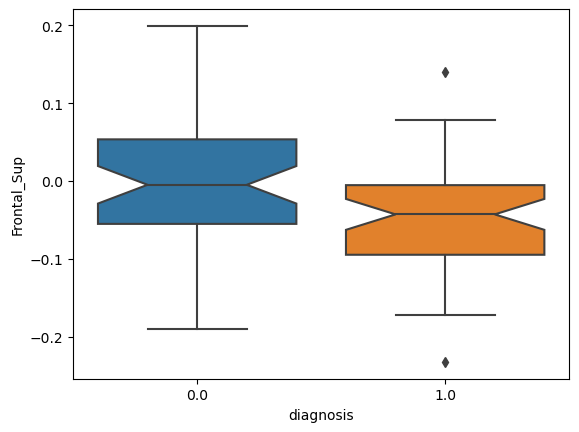

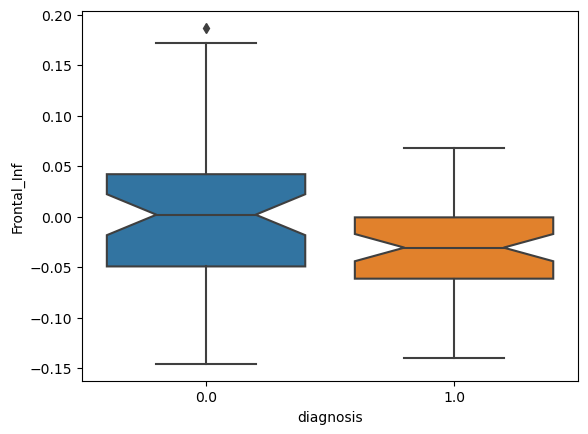

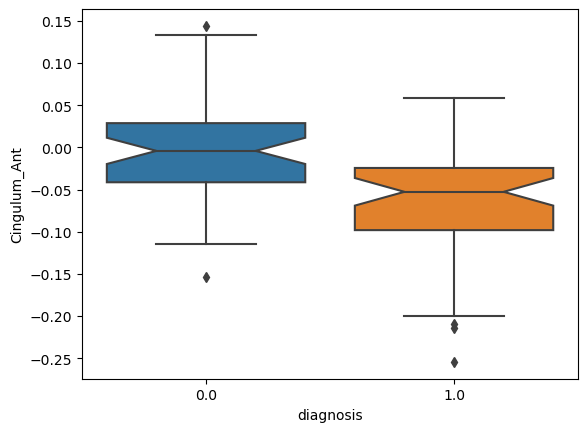

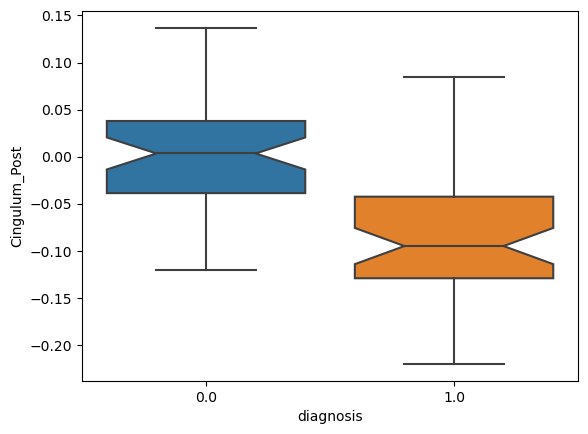

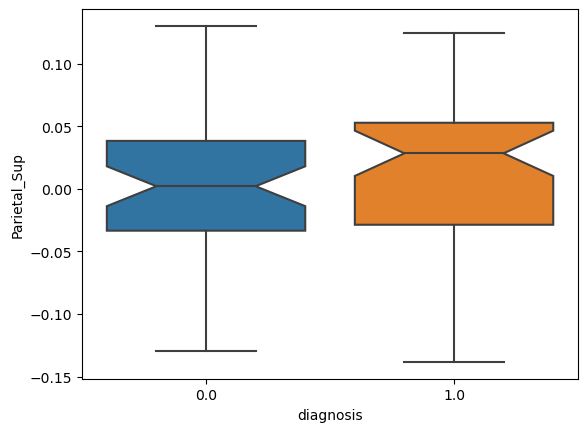

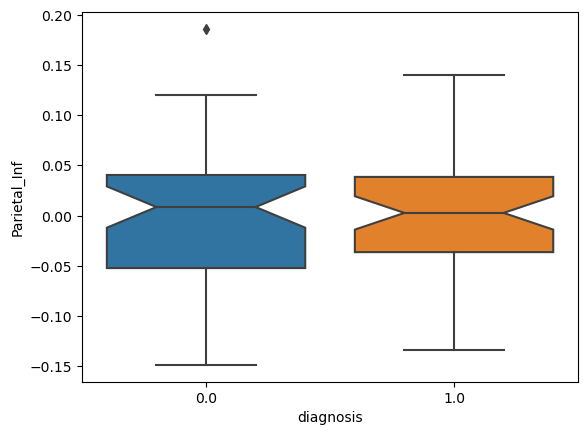

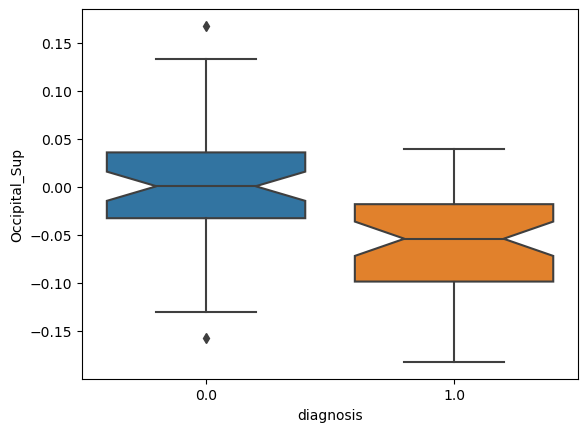

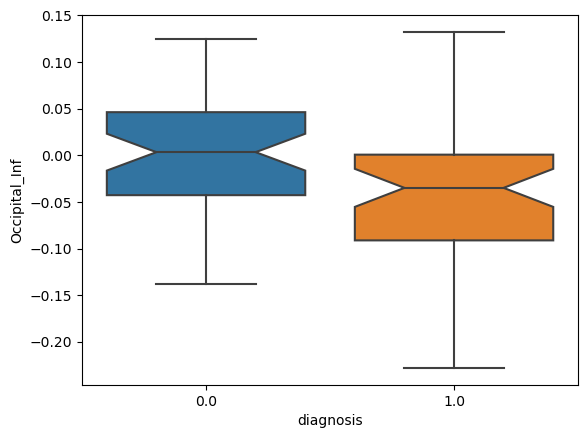

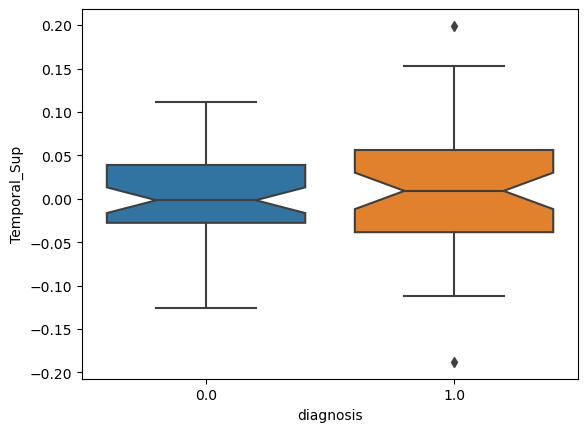

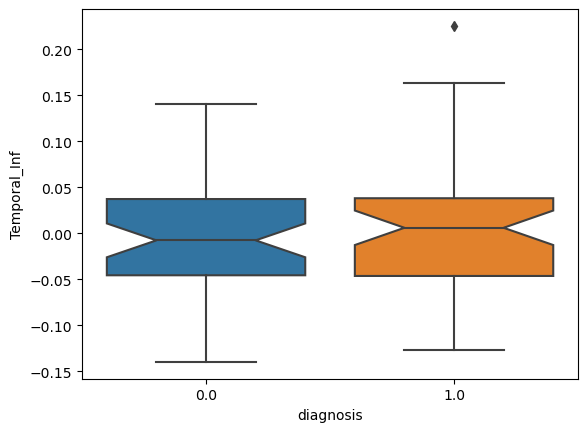

In [33]:
for i in data.drop(columns=['age', 'sex', 'diagnosis']).columns:
    y, X = dmatrices(
        # interaction terms
        f'{i} ~ age + sex + diagnosis + sex:diagnosis',
        data=data,
        return_type='dataframe'
    )
    # remove other effects
    y_hat = y[i] - np.dot(X[X.columns[X.columns != 'diagnosis']], B.loc[B.index != 'diagnosis', i])
    df = pd.concat([X['diagnosis'], y_hat], axis=1)
    # visualize
    sns.boxplot(data=df, x='diagnosis', y=i, notch=True)
    plt.show()

We can also explore the interaction effect between sex and diagnosis.

In [34]:
df_bh = pvals.loc['sex:diagnosis'].rename('pvals').to_frame()
df_bh

,pvals
Frontal_Sup,0.160576
Frontal_Inf,0.036845
Cingulum_Ant,0.792013
Cingulum_Post,0.000778
Parietal_Sup,0.930997
Parietal_Inf,0.234558
Occipital_Sup,0.061775
Occipital_Inf,0.078049
Temporal_Sup,0.956729
Temporal_Inf,0.803743


In [35]:
# sort by pval
df_bh = df_bh.sort_values('pvals')
# rank
df_bh['rank'] = df_bh.rank()
# get BH critical value
df_bh['crit'] = df_bh.apply(lambda x: (x['rank']/len(df_bh))*FDR, axis=1)

df_bh

,pvals,rank,crit
Cingulum_Post,0.000778,1.0,0.005
Frontal_Inf,0.036845,2.0,0.010
Occipital_Sup,0.061775,3.0,0.015
Occipital_Inf,0.078049,4.0,0.020
Frontal_Sup,0.160576,5.0,0.025
Parietal_Inf,0.234558,6.0,0.030
Cingulum_Ant,0.792013,7.0,0.035
Temporal_Inf,0.803743,8.0,0.040
Parietal_Sup,0.930997,9.0,0.045
Temporal_Sup,0.956729,10.0,0.050


In [36]:
# get highest rank where pval < crit
rank_max = df_bh[df_bh['pvals'] < df_bh['crit']]['rank'].max()
# all significant pvals
df_bh[df_bh['rank'] <= rank_max]

,pvals,rank,crit
Cingulum_Post,0.000778,1.0,0.005


**We can see that the following regions are significantly affected by the interaction between sex and diagnosis: Cingulum_Post**

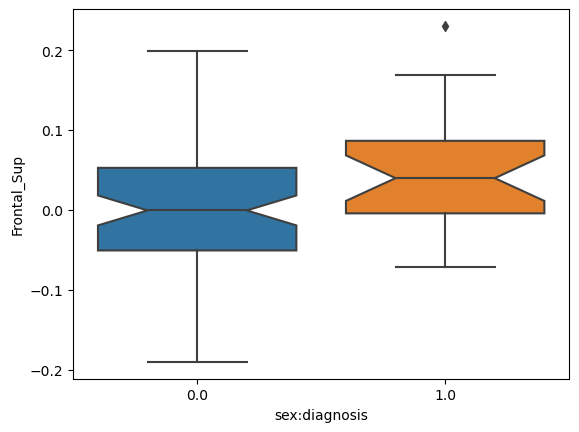

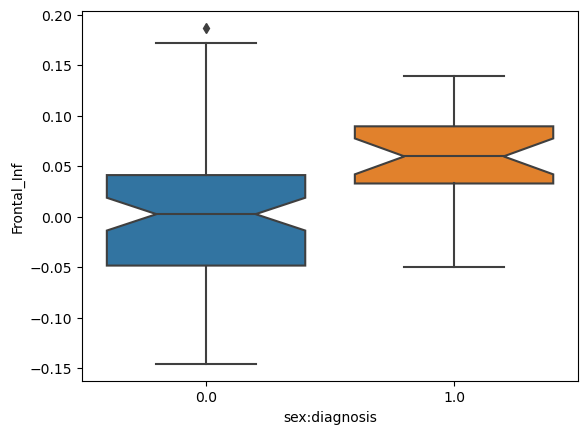

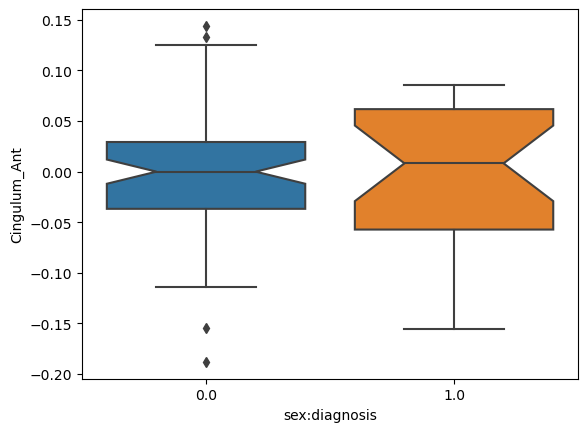

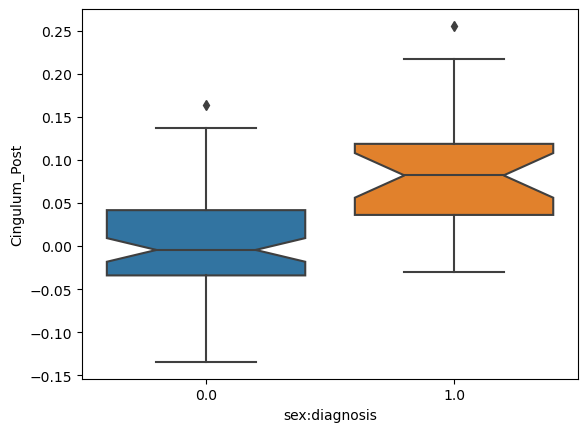

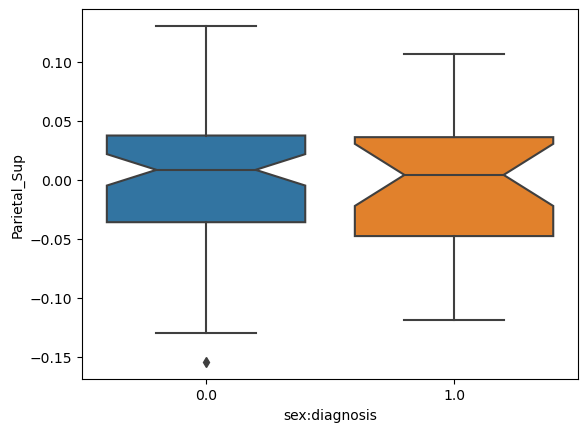

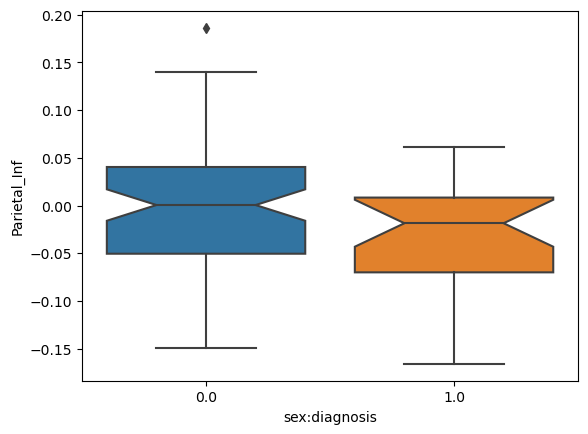

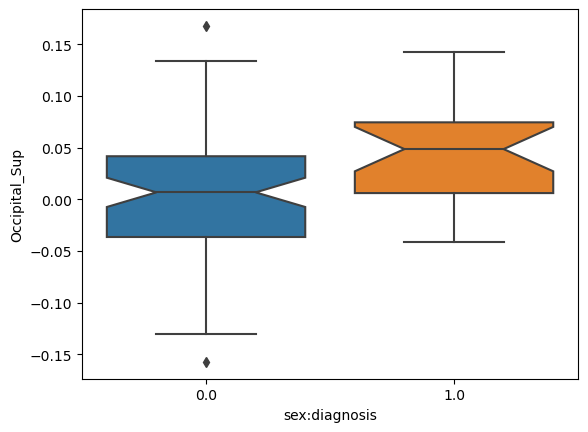

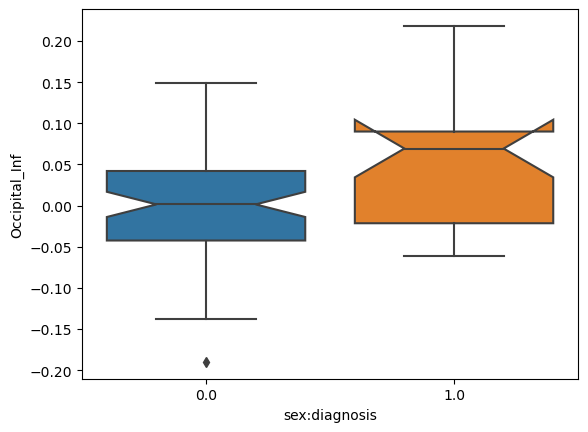

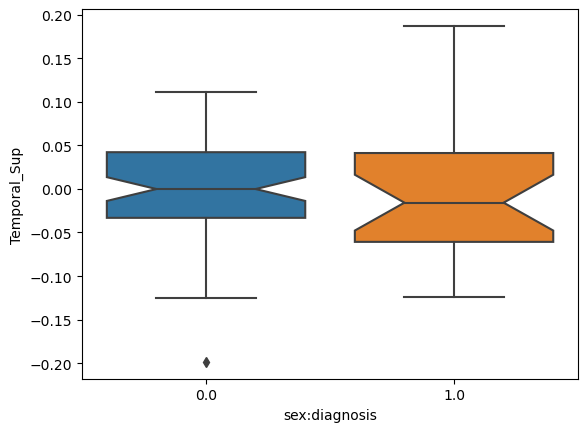

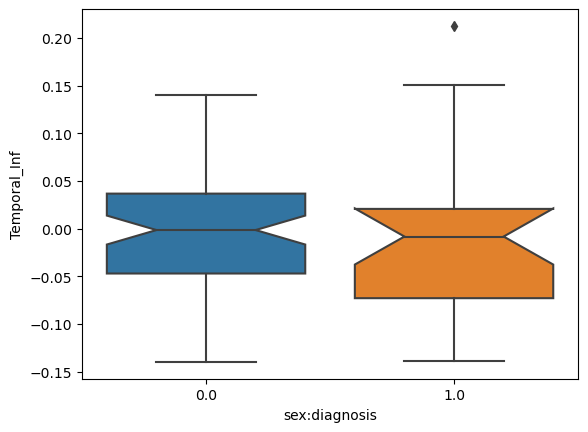

In [37]:
for i in data.drop(columns=['age', 'sex', 'diagnosis']).columns:
    y, X = dmatrices(
        # interaction terms
        f'{i} ~ age + sex + diagnosis + sex:diagnosis',
        data=data,
        return_type='dataframe'
    )
    # remove other effects
    y_hat = y[i] - np.dot(X[X.columns[X.columns != 'sex:diagnosis']], B.loc[B.index != 'sex:diagnosis', i])
    df = pd.concat([X['sex:diagnosis'], y_hat], axis=1)
    # visualize
    sns.boxplot(data=df, x='sex:diagnosis', y=i, notch=True)
    plt.show()

<hr>

# IGNORE BELOW

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Y = data.drop(columns=['age', 'sex', 'diagnosis'])
X = data.loc[:, ['age', 'sex', 'diagnosis']]

reg = LinearRegression()

In [ ]:
display(X)
display(Y)

<hr>

It is expected that there are following interactions: age and sex; age and diagnosis; sex and diagnosis. Interaction terms are thus added.

In [ ]:
xs = [
    'intercept', 'age', 'sex', 'diagnosis', 'age_sex', 'age_diagnosis', 'sex_diagnosis'
]

poly = PolynomialFeatures(2, interaction_only=True, include_bias=True)
X = pd.DataFrame(poly.fit_transform(X), columns=xs)

In [ ]:
display(X)
display(Y)

<hr>

In [ ]:
# # do for each brain region
# for i in Y.columns:
#     print('Region: ', i)
#     # ground truth of brain region
#     y = Y[i]
#     # fit
#     reg.fit(X,y)
#     print('Score: ', reg.score(X,y))
#     # get weights
#     b = pd.Series(reg.coef_, index=xs)
#     print('Weights: ')
#     display(b)
#     # get y hat to remove effect of age and sex
#     y_hat = y - np.dot(X[X.columns[X.columns != 'diagnosis']], b[b.index != 'diagnosis'])
#     df = pd.concat([X['diagnosis'], y_hat], axis=1)
#     display(df)
#     sns.boxplot(data=df, x='diagnosis', y=i, notch=True)
#     plt.show()

<hr>

We can fit a linear model and remove confounding effects to see whether diagnosis has an effect on biomarkers.

In [ ]:
# fit linear model
reg.fit(X,Y)

In [ ]:
reg.score(X, Y)

In [ ]:
# weights
B = pd.DataFrame(reg.coef_.T, index=xs, columns=Y.columns)
B

In [ ]:
# remove confounding effects
Y_hat = Y - np.dot(X[X.columns[X.columns != 'diagnosis']], B[B.index != 'diagnosis'])
Y_hat

In [ ]:
df = pd.concat([X['diagnosis'], Y_hat], axis=1)
df

We can visualize the effect of the diagnosis.

In [ ]:
for i in df.drop(columns=['diagnosis']).columns:
    # plot boxplot
    sns.boxplot(data=df, x='diagnosis', y=i, notch=True)
    plt.show()

We can use a two-tailed two-sample t-test to see whether the difference in biomarker is significant between the diseased group and healthy controls.

In [ ]:
biomarkers_control = df.loc[df['diagnosis'] == 0, df.columns[df.columns != 'diagnosis']]
biomarkers_disease = df.loc[df['diagnosis'] == 1, df.columns[df.columns != 'diagnosis']]
display(biomarkers_control)
display(biomarkers_disease)

In [ ]:
result = stats.ttest_ind(
    biomarkers_control,
    biomarkers_disease,
    axis=0,
    alternative='two-sided'
)
result

Before making conclusions for significance, we need to correct for multiple testing using the Benjamini-Hochberg procedure. Here, we set the false discovery rate to 0.05.

In [ ]:
FDR = 0.05

In [ ]:
# get df of pvals
df_bh = pd.Series(result.pvalue, index=biomarkers_control.columns, name='pvals').to_frame()
# sort by pval
df_bh = df_bh.sort_values('pvals')
# rank
df_bh['rank'] = df_bh.rank()
# get BH critical value
df_bh['crit'] = df_bh.apply(lambda x: (x['rank']/len(df_bh))*FDR, axis=1)

df_bh

In [ ]:
# get highest rank where pval < crit
rank_max = df_bh[df_bh['pvals'] < df_bh['crit']]['rank'].max()
# all significant pvals
df_bh[df_bh['rank'] <= rank_max]

**We can see that the following regions are significantly affected by the disease: Temporal_Inf, Cingulum_Post, Occipital_Inf, Frontal_Inf, Temporal_Sup, Cingulum_Ant, Parietal_Sup, Frontal_Sup**

We can also explore the interaction effect between sex and diagnosis.

In [ ]:
# remove other effects
Y_hat = Y - np.dot(X[X.columns[X.columns != 'sex_diagnosis']], B[B.index != 'sex_diagnosis'])
Y_hat

In [ ]:
df = pd.concat([X['sex_diagnosis'], Y_hat], axis=1)
df

In [ ]:
for i in df.drop(columns=['sex_diagnosis']).columns:
    # plot boxplot
    sns.boxplot(data=df, x='sex_diagnosis', y=i, notch=True)
    plt.show()

In [ ]:
biomarkers_control = df.loc[df['sex_diagnosis'] == 0, df.columns[df.columns != 'sex_diagnosis']]
biomarkers_disease = df.loc[df['sex_diagnosis'] == 1, df.columns[df.columns != 'sex_diagnosis']]
display(biomarkers_control)
display(biomarkers_disease)

In [ ]:
result = stats.ttest_ind(
    biomarkers_control,
    biomarkers_disease,
    axis=0,
    alternative='two-sided'
)
result

In [ ]:
# get df of pvals
df_bh = pd.Series(result.pvalue, index=biomarkers_control.columns, name='pvals').to_frame()
# sort by pval
df_bh = df_bh.sort_values('pvals')
# rank
df_bh['rank'] = df_bh.rank()
# get BH critical value
df_bh['crit'] = df_bh.apply(lambda x: (x['rank']/len(df_bh))*FDR, axis=1)

df_bh

In [ ]:
# get highest rank where pval < crit
rank_max = df_bh[df_bh['pvals'] < df_bh['crit']]['rank'].max()
# all significant pvals
df_bh[df_bh['rank'] <= rank_max]

**The following regions have significant interaction effect between sex and diagnosis: Cingulum_Post, Frontal_Inf, Occipital_Sup, Occipital_Inf, Frontal_Sup**

In [ ]:
df = pd.concat([X, Y], axis=1)
df

In [ ]:
for i in df.drop(columns=xs).columns:
    # plot boxplot
    sns.boxplot(data=df, x='sex', y=i, hue='diagnosis', notch=True)
    plt.show()